Name: Tushar Muley

Assignment: Assignment 10

Date: January 30, 2022

### Assignment 10.1

#### Assignment 10.1a

In [1]:
 # import libraries
import string
import numpy as np

In [2]:
# the tokenizer fuction
def tokenize(sentence):
    tokens = []
# remove punctuations
    sentence = sentence.translate(str.maketrans('','',string.punctuation))
    tokens = sentence.split()
    return tokens

In [4]:
# check the tokenizer function
sentence = "Hello! Welcome to the class! This will be your last class before you graduate."
tokens = tokenize(sentence)
print(tokens)

['Hello', 'Welcome', 'to', 'the', 'class', 'This', 'will', 'be', 'your', 'last', 'class', 'before', 'you', 'graduate']


#### Assignment 10.1b

In [5]:
# ngrams fuction
def ngrams(tokens, n):
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngram = []
        for a in range(n):
            ngram.append(tokens[i+a])
        ngrams.append(ngram)
    return ngrams

In [6]:
# check the ngrams function
ngrams = ngrams(tokens, 3)
print(ngrams)

[['Hello', 'Welcome', 'to'], ['Welcome', 'to', 'the'], ['to', 'the', 'class'], ['the', 'class', 'This'], ['class', 'This', 'will'], ['This', 'will', 'be'], ['will', 'be', 'your'], ['be', 'your', 'last'], ['your', 'last', 'class'], ['last', 'class', 'before'], ['class', 'before', 'you'], ['before', 'you', 'graduate']]


#### Assignment 10.1c

In [7]:
# one_hot_encode function

def one_hot_encode(tokens, num_words):
    token_index = {}
    for token in tokens:
        if token not in token_index:
            token_index[token] = len(token_index) + 1
            
    results = np.zeros(shape=(num_words,max(token_index.values()) + 1))
    
    for i, token in list(enumerate(tokens))[:num_words]:
        index = token_index.get(token)
        results[i, index] = 1.
    
    return results

In [8]:
# check the one_hot_encode function

results = one_hot_encode(tokens, 20)
print(results)


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### Assignment 10.2

Using listings 6.16, 6.17, and 6.18 in Deep Learning with Python as a guide, train a sequential model with embeddings on the IMDB data found in data/external/imdb/. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [36]:
# import libraries
import os, pathlib, shutil, random
from pathlib import Path
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import LSTM
from keras import layers
from keras.optimizers import RMSprop


In [10]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  2884k      0  0:00:28  0:00:28 --:--:-- 4590k


In [11]:
!rm -r aclImdb/train/unsup

In [12]:
!cat aclImdb/train/pos/4077_10.txt

I first saw this back in the early 90s on UK TV, i did like it then but i missed the chance to tape it, many years passed but the film always stuck with me and i lost hope of seeing it TV again, the main thing that stuck with me was the end, the hole castle part really touched me, its easy to watch, has a great story, great music, the list goes on and on, its OK me saying how good it is but everyone will take there own best bits away with them once they have seen it, yes the animation is top notch and beautiful to watch, it does show its age in a very few parts but that has now become part of it beauty, i am so glad it has came out on DVD as it is one of my top 10 films of all time. Buy it or rent it just see it, best viewing is at night alone with drink and food in reach so you don't have to stop the film.<br /><br />Enjoy

In [13]:
base_dir = pathlib.Path("aclImdb")
val_dir = base_dir / "val"
train_dir = base_dir / "train"
for category in ("neg", "pos"):
    os.makedirs(val_dir / category)
    files = os.listdir(train_dir / category)
    random.Random(1337).shuffle(files)
    num_val_samples = int(0.2 * len(files))
    val_files = files[-num_val_samples:]
    for fname in val_files:
        shutil.move(train_dir / category / fname, val_dir / category / fname)

In [14]:
current_dir = Path(os.getcwd()).absolute()
imdb_dir = current_dir.joinpath('aclImdb')
train_dir = os.path.join(imdb_dir, 'train')


In [15]:
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

##### Tokenizing the text of the IMDB data

In [16]:
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
embedding_dim = 100

In [17]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)


In [18]:
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))


Found 80258 unique tokens


In [19]:
data = pad_sequences(sequences, maxlen=maxlen)

In [20]:
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (20000, 100)
Shape of label tensor: (20000,)


In [21]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [22]:
# split the data
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


#### Train the model

In [23]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])


In [25]:
history = model.fit(x_train, y_train, epochs=10,batch_size=32,validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 1s 130ms/step - loss: 0.6952 - acc: 0.5100 - val_loss: 0.6934 - val_acc: 0.5130
Epoch 2/10
7/7 [==============================] - 1s 107ms/step - loss: 0.5170 - acc: 0.9850 - val_loss: 0.7009 - val_acc: 0.5103
Epoch 3/10
7/7 [==============================] - 1s 115ms/step - loss: 0.3082 - acc: 0.9950 - val_loss: 0.6978 - val_acc: 0.5142
Epoch 4/10
7/7 [==============================] - 1s 114ms/step - loss: 0.1430 - acc: 1.0000 - val_loss: 0.7186 - val_acc: 0.5084
Epoch 5/10
7/7 [==============================] - 1s 111ms/step - loss: 0.0681 - acc: 1.0000 - val_loss: 0.6968 - val_acc: 0.5342
Epoch 6/10
7/7 [==============================] - 1s 109ms/step - loss: 0.0345 - acc: 1.0000 - val_loss: 0.7414 - val_acc: 0.5150
Epoch 7/10
7/7 [==============================] - 1s 107ms/step - loss: 0.0194 - acc: 1.0000 - val_loss: 0.7112 - val_acc: 0.5260
Epoch 8/10
7/7 [==============================] - 1s 108ms/step - loss: 0.0105 - acc: 1.00

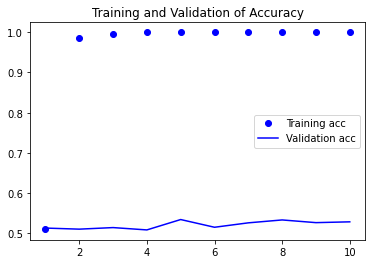

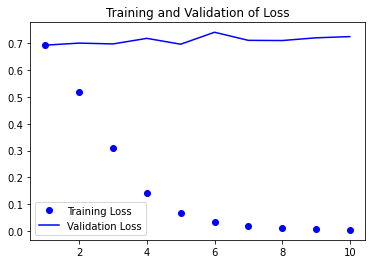

In [26]:
# plot the data
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation of Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation of Loss')
plt.legend()

plt.show()


 #### The Test Data Set

In [27]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

                
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)


In [28]:
# evaluate the model on test data set
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7313 - acc: 0.5232


[0.7313319444656372, 0.5231599807739258]

#### Assginment 10.3

#### Using the LSTM layer in Keras

Using listing 6.27 in Deep Learning with Python as a guide, fit the same data with an LSTM layer. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [30]:
# set variable
max_features = 10000

In [31]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])


In [33]:
 history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
2/2 [==============================] - 3s 1s/step - loss: 0.6933 - acc: 0.4650 - val_loss: 0.6927 - val_acc: 0.5179
Epoch 2/10
2/2 [==============================] - 3s 1s/step - loss: 0.6878 - acc: 0.7150 - val_loss: 0.6920 - val_acc: 0.5338
Epoch 3/10
2/2 [==============================] - 3s 1s/step - loss: 0.6801 - acc: 0.8550 - val_loss: 0.6909 - val_acc: 0.5663
Epoch 4/10
2/2 [==============================] - 3s 1s/step - loss: 0.6696 - acc: 0.9350 - val_loss: 0.6890 - val_acc: 0.5732
Epoch 5/10
2/2 [==============================] - 3s 1s/step - loss: 0.6512 - acc: 0.9650 - val_loss: 0.6840 - val_acc: 0.5756
Epoch 6/10
2/2 [==============================] - 3s 1s/step - loss: 0.6051 - acc: 0.9750 - val_loss: 0.6552 - val_acc: 0.6181
Epoch 7/10
2/2 [==============================] - 2s 1s/step - loss: 0.5260 - acc: 0.8250 - val_loss: 0.6571 - val_acc: 0.6022
Epoch 8/10
2/2 [==============================] - 3s 1s/step - loss: 0.4027 - acc: 0.9300 - val_loss: 0.6416 - 

#### Plot the data

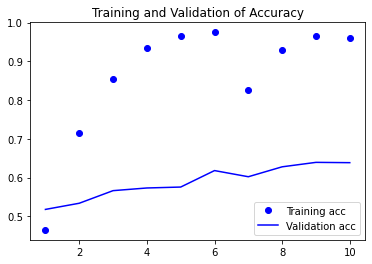

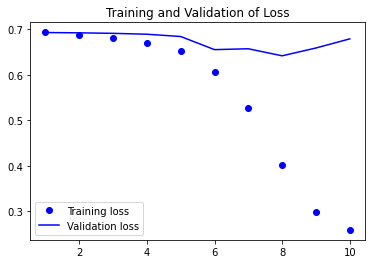

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation of Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation of Loss')
plt.legend()

plt.show()


####  Evaluate the model on test set

In [35]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 15s 19ms/step - loss: 0.6837 - acc: 0.6322


[0.6837488412857056, 0.6321600079536438]

### Assignment 10.4

####  Training and evaluating a simple 1D convnet on the IMDB data

Using listing 6.46 in Deep Learning with Python as a guide, fit the same data with a simple 1D convnet. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [37]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 94, 32)            28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 18, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 12, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [38]:
model.compile(optimizer=RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])


In [39]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))


Epoch 1/10
2/2 [==============================] - 1s 299ms/step - loss: 1.1820 - acc: 0.5000 - val_loss: 1.0516 - val_acc: 0.5024
Epoch 2/10
2/2 [==============================] - 1s 273ms/step - loss: 0.9587 - acc: 0.5000 - val_loss: 0.9895 - val_acc: 0.5024
Epoch 3/10
2/2 [==============================] - 1s 250ms/step - loss: 0.8808 - acc: 0.5000 - val_loss: 0.9480 - val_acc: 0.5024
Epoch 4/10
2/2 [==============================] - 0s 249ms/step - loss: 0.8273 - acc: 0.5000 - val_loss: 0.9174 - val_acc: 0.5024
Epoch 5/10
2/2 [==============================] - 0s 238ms/step - loss: 0.7866 - acc: 0.5000 - val_loss: 0.8922 - val_acc: 0.5024
Epoch 6/10
2/2 [==============================] - 0s 247ms/step - loss: 0.7529 - acc: 0.5000 - val_loss: 0.8697 - val_acc: 0.5024
Epoch 7/10
2/2 [==============================] - 0s 229ms/step - loss: 0.7235 - acc: 0.5000 - val_loss: 0.8523 - val_acc: 0.5024
Epoch 8/10
2/2 [==============================] - 1s 250ms/step - loss: 0.6990 - acc: 0.50

#### Plotting the data

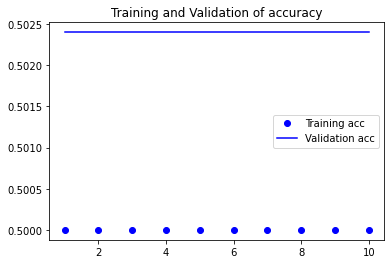

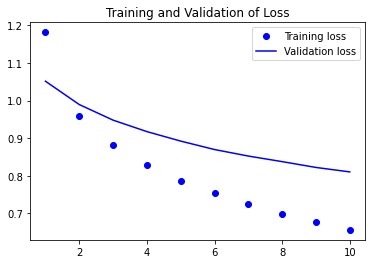

In [40]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation of accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation of Loss')
plt.legend()

plt.show()


#### Evaluate the test data

In [41]:
 model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.8107 - acc: 0.5000


[0.8106999397277832, 0.5]